# VCF and image files available for the same patients


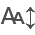

In [1]:
import numpy as np
import pandas as pd
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)
import itables.options as opt

opt.classes="display nowrap compact"
opt.buttons=["copyHtml5", "csvHtml5", "excelHtml5"]
opt.maxBytes=0
import os
os.environ['CDA_API_URL'] = 'https://cancerdata.dsde-dev.broadinstitute.org/'

In [2]:
from cdapython import tables, columns, column_values, fetch_rows, summary_counts

I'm a cancer researcher, and I have a hypothesis that I can correlate a specific mutation with a specific thyroid cancer morphology. I'm looking for subjects that have thyroid cancer with both CT and sequencing data that I might be able to incorporate into my research.

First, decide what column to search. I'm looking for columns that have to do with file type:

In [3]:
columns(table="file")

table                  column data_type  nullable  \
0   file                 file_id      text     False   
1   file               byte_size    bigint      True   
2   file                checksum      text      True   
3   file           data_category      text      True   
4   file           data_modality      text      True   
5   file               data_type      text      True   
6   file  dbgap_accession_number      text      True   
7   file                 drs_uri      text      True   
8   file             file_format      text      True   
9   file        imaging_modality      text      True   
10  file          imaging_series      text      True   
11  file                   label      text      True   

                                          description  
0   The logical identifier of the entity in the re...  
1   Size of the file in bytes. Maps to dcat:byteSize.  
2   A digit representing the sum of the correct di...  
3   Broad categorization of the contents of the da...  
4   Data modality describes the biological nature ...  
5             Specific content type of the data file.  
6         The dbgap accession number for the project.  
7   A string of characters used to identify a reso...  
8                           Format of the data files.  
9   An imaging modality describes the imaging equi...  
10  The logical identifier of the series or groupi...  
11  Short name or abbreviation for dataset. Maps t...

In [4]:
column_values("data_type")

data_type     count
0                               CT Image Storage  27481629
1                               MR Image Storage  12799704
2     Positron Emission Tomography Image Storage   1305545
3                Secondary Capture Image Storage    238356
4        VL Whole Slide Microscopy Image Storage    204114
..                                           ...       ...
63         Key Object Selection Document Storage        40
64                  Differential Gene Expression        36
65              Real World Value Mapping Storage        20
66  Digital X-Ray Image Storage - For Processing         2
67               X-Ray Radiation Dose SR Storage         1

[68 rows x 2 columns]

CT image storage and annotated somatic mutation files should give me the data I want. Now to find a column to seperate out the thyroid cancer subjects:

In [31]:
columns(column = "*diagnosis*")

table                       column data_type  nullable  \
0        diagnosis                 diagnosis_id      text     False   
1        diagnosis             age_at_diagnosis   integer      True   
2        diagnosis          method_of_diagnosis      text      True   
3        diagnosis            primary_diagnosis      text      True   
4  researchsubject  primary_diagnosis_condition      text      True   
5  researchsubject       primary_diagnosis_site      text      True   

                                         description  
0  The logical identifier of the entity in the re...  
1  The age in days of the individual at the time ...  
2  The method used to confirm the subjects malign...  
3  The diagnosis instance that qualified a subjec...  
4  The text term used to describe the type of mal...  
5  The text term used to describe the primary sit...

In [33]:
column_values("primary_diagnosis_site", filters= "*thyroid*" )

primary_diagnosis_site  count
0           Thyroid gland   1881
1                 Thyroid    507
2  Thyroid Gland, Unknown     35
3           Thyroid Gland     27

Looks like there are lots of thyroid patients, however thyroid has been specified a few different ways, so I'll have to search with a wildcard. `thyroid*` will match anything that starts with `thyroid` no matter what words or letters are after it. I want subject data, so I'll search the subject table, but I want to add the file data on so I know where to get the files, that makes my final search look like this:

In [34]:
fetch_rows(table="subject", match_all=['primary_diagnosis_site = thyroid*', 'data_type = CT Image Storage', 'data_type = Annotated Somatic Mutation'], link_to_table="file")

subject_id cause_of_death  days_to_birth  days_to_death  \
0     TCGA.TCGA-DE-A4MA                        -19100           <NA>   
1     TCGA.TCGA-DE-A4MA                        -19100           <NA>   
2     TCGA.TCGA-DE-A4MA                        -19100           <NA>   
3     TCGA.TCGA-DE-A4MA                        -19100           <NA>   
4     TCGA.TCGA-DE-A4MA                        -19100           <NA>   
...                 ...            ...            ...            ...   
3411  TCGA.TCGA-E3-A3E5                        -20993           <NA>   
3412  TCGA.TCGA-E3-A3E5                        -20993           <NA>   
3413  TCGA.TCGA-E3-A3E5                        -20993           <NA>   
3414  TCGA.TCGA-E3-A3E5                        -20993           <NA>   
3415  TCGA.TCGA-E3-A3E5                        -20993           <NA>   

                   ethnicity                       race     sex       species  \
0     not hispanic or latino  black or african american  female  Homo sapiens   
1     not hispanic or latino  black or african american  female  Homo sapiens   
2     not hispanic or latino  black or african american  female  Homo sapiens   
3     not hispanic or latino  black or african american  female  Homo sapiens   
4     not hispanic or latino  black or african american  female  Homo sapiens   
...                      ...                        ...     ...           ...   
3411  not hispanic or latino                      white    male  Homo sapiens   
3412  not hispanic or latino                      white    male  Homo sapiens   
3413  not hispanic or latino                      white    male  Homo sapiens   
3414  not hispanic or latino                      white    male  Homo sapiens   
3415  not hispanic or latino                      white    male  Homo sapiens   

     vital_status                               file_id  ...  \
0           Alive  005ae689-64d7-489f-b77a-81f65e21c628  ...   
1           Alive  0604b260-0981-49dd-a6f1-4e083385f94f  ...   
2           Alive  071ba9f3-40fc-418f-a9b8-6084ef36218a  ...   
3           Alive  08a89354-07ae-44eb-a8bd-b0c0d1cc599b  ...   
4           Alive  08e51189-371d-4c6a-915f-7b4df609f8f9  ...   
...           ...                                   ...  ...   
3411        Alive  f4a58ff2-1673-4ba3-ad99-b9e0ee3ce2db  ...   
3412        Alive  f6747a80-77b9-4435-9cea-16e057264200  ...   
3413        Alive  f868fe22-3cda-4df4-bb29-3180822f13dd  ...   
3414        Alive  fa631e82-6c75-47b3-b435-f5201518ce6e  ...   
3415        Alive  fcb1ede0-4e61-4b13-8b51-ac3b917739d4  ...   

                              checksum                data_category  \
0     2961fdd26bdb99c486944f1ee64421d4                  Biospecimen   
1     ab4dd7f1d161d39422ea52df46c3f06b                  Biospecimen   
2     675ed4171e18caee832c172daac45226             Sequencing Reads   
3     59829950cfd3da7d8c5717afdc6e447f  Simple Nucleotide Variation   
4     e10e9d0eca5d676402e1b19dffc129ad                     Clinical   
...                                ...                          ...   
3411  62d83e0c80f8a6219939791d79abe855             Sequencing Reads   
3412  fe975dfe8f8cf80c78011f3899d2dea7        Copy Number Variation   
3413  6e5690795ff424264402ab9d2661b62b         Structural Variation   
3414  eb56434e2cdc3fe807928607de5d8248  Simple Nucleotide Variation   
3415  341cb6513d1add73af5b6ac0b87aed77  Simple Nucleotide Variation   

     data_modality                    data_type dbgap_accession_number  \
0          Genomic       Biospecimen Supplement              phs000178   
1          Genomic       Biospecimen Supplement              phs000178   
2          Genomic                Aligned Reads              phs000178   
3          Genomic  Raw Simple Somatic Mutation              phs000178   
4          Genomic             Pathology Report              phs000178   
...            ...                          ...                    ...   
3411       Genomic                A